#**NAME: IDRIS BABALOLA**


#**THYROID DISEASE CLASSIFICATION**

#INSTALLING SOME LIBRARIES

In [ ]:
!pip install lazypredict

#LOADING THE REQUIRED PYTHON LIBRARIES AND MODULES

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pointbiserialr

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from lazypredict.Supervised import LazyClassifier

# LOADING THE NEW-THYROID.NAMES TEXT FILE TO MEMORY

In [ ]:
with open('new-thyroid.names', 'r') as f:
    print(f.read())


1. Title of Database: 
   Thyroid gland data. ('normal', hypo and hyper functioning)

2. Sources:
   (a) Original owner
   	Danny Coomans, Dept. of Maths. and Stats., James Cook University,
   	Townsville 4811, Australia.  email: madhc@manta.jcu.edu.au
   (b) Donor of database
	Stefan Aeberhard, Dept. of Comp. Science, James Cook University,
        Townsville 4811, Australia.  email: stefan@coral.cs.jcu.edu.au
   (c) Date received 
	July, 1992
 
3. Past Usage:
   - (a) Coomans, D., Broeckaert, M. Jonckheer M. and Massart D.L.,
       "Comparison of Multivariate Discriminant Techniques for 
	Clinical Data - Application to the Thyroid Functional State",
	Meth. Inform. Med. 22 (1983) pp. 93-101.

     (b) The data was used for comparing 16 different discriminant
	techniques, each trying to predict the state of the 
	thyroid gland.

   - (a) Coomans, D. and I. Broeckaert, "Potential Pattern Recognition
	in Cemical and Medical Decision Making", Research Studies Press,
	Letchworth, England

## DECLARING A LIST CONTAINING COLUMN NAMES RETRIEVED FROM THE .NAMES TEXT FILE

In [ ]:
# Declaring the data column names
Column_Names = [
'Target Variable',
'T3-resin',
'Serum thyroxin',
'Serum triiodothyronine',
'TSH',
'Difference of TSH'
]

# LOADING DATAFRAME OF THE RAW DATASET

In [ ]:
df = pd.read_csv(('new-thyroid.data'), header=None, sep=',', engine='python')
df

,0,1,2,3,4,5
0,1,107,10.10,2.20,0.90,2.70
1,1,113,9.90,3.10,2.00,5.90
2,1,127,12.90,2.40,1.40,0.60
3,1,109,5.30,1.60,1.40,1.50
4,1,105,7.30,1.50,1.50,-0.10
...,...,...,...,...,...,...
210,3,118,6.50,1.30,1.70,11.50
211,3,139,4.20,0.70,4.30,6.30
212,3,103,5.10,1.40,1.20,5.00
213,3,97,4.70,1.10,2.10,12.60


# DATA CLEANING STEPS

##(i) Appending the column names to the dataframe and saving the cleaned dataset

In [ ]:
def Clean_Column_Names(dataframe):
    '''Function to append the column names of the dataframe'''
    dataframe.columns = Column_Names
    dataframe.to_csv(('new-thyroid.csv'), index=False)
    return dataframe

df = Clean_Column_Names(df)
df

,Target Variable,T3-resin,Serum thyroxin,Serum triiodothyronine,TSH,Difference of TSH
0,1,107,10.10,2.20,0.90,2.70
1,1,113,9.90,3.10,2.00,5.90
2,1,127,12.90,2.40,1.40,0.60
3,1,109,5.30,1.60,1.40,1.50
4,1,105,7.30,1.50,1.50,-0.10
...,...,...,...,...,...,...
210,3,118,6.50,1.30,1.70,11.50
211,3,139,4.20,0.70,4.30,6.30
212,3,103,5.10,1.40,1.20,5.00
213,3,97,4.70,1.10,2.10,12.60


## (ii) Checking for Null values

In [ ]:
def Check_For_Nulls(dataframe):
    '''Function to check for nulls in the dataframe'''
    print('Checking for Nulls in the Dataframe')
    print(dataframe.isnull().sum())

Check_For_Nulls(df)

Checking for Nulls in the Dataframe
Target Variable           0
T3-resin                  0
Serum thyroxin            0
Serum triiodothyronine    0
TSH                       0
Difference of TSH         0
dtype: int64


##(iii) Custom Function to handle missing values(in future) and fill with KNN Imputer

In [ ]:
def Check_Display_Remove_Nulls(dataframe):
    # Check for nulls
    print("Nulls in the dataframe before: \n")
    check = dataframe.isnull().sum()
    print(check)
    if check.sum() == 0:
        return False
    else:
        return True

def Impute_Using_KNN_Impute(dataframe):
    # Impute using KNN Impute
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    dataframe = pd.DataFrame(imputer.fit_transform(dataframe), columns=dataframe.columns)
    return dataframe

check = Check_Display_Remove_Nulls(df)

if check:
    df = Impute_Using_KNN_Impute(df)
    check = Check_Display_Remove_Nulls(df)

Nulls in the dataframe before: 

Target Variable           0
T3-resin                  0
Serum thyroxin            0
Serum triiodothyronine    0
TSH                       0
Difference of TSH         0
dtype: int64


#(iv) Inspecting the dataset for anomalies

In [ ]:
def Initial_Data_Exploration(dataframe):
    '''Function to display basic information about the data'''
    #get structure of data
    print('Displaying the basic information about the data')
    print(dataframe.info(),'\n')

    #get dimensions of data
    print('Displaying the dimensions of the data')
    print(dataframe.shape,'\n')

    #get Number columns
    print('Displaying the number and list of columns')
    print(len(dataframe.columns),dataframe.columns)

Initial_Data_Exploration(df)

Displaying the basic information about the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target Variable         215 non-null    int64  
 1   T3-resin                215 non-null    int64  
 2   Serum thyroxin          215 non-null    float64
 3   Serum triiodothyronine  215 non-null    float64
 4   TSH                     215 non-null    float64
 5   Difference of TSH       215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB
None 

Displaying the dimensions of the data
(215, 6) 

Displaying the number and list of columns
6 Index(['Target Variable', 'T3-resin', 'Serum thyroxin',
       'Serum triiodothyronine', 'TSH', 'Difference of TSH'],
      dtype='object')


**OBSERVATION:** The dataset appears to be clean from source, hence further steps are not required.

# LOADING THE CLEANED DATASET

In [ ]:
df = pd.read_csv('new-thyroid.csv')
df

,Target Variable,T3-resin,Serum thyroxin,Serum triiodothyronine,TSH,Difference of TSH
0,1,107,10.10,2.20,0.90,2.70
1,1,113,9.90,3.10,2.00,5.90
2,1,127,12.90,2.40,1.40,0.60
3,1,109,5.30,1.60,1.40,1.50
4,1,105,7.30,1.50,1.50,-0.10
...,...,...,...,...,...,...
210,3,118,6.50,1.30,1.70,11.50
211,3,139,4.20,0.70,4.30,6.30
212,3,103,5.10,1.40,1.20,5.00
213,3,97,4.70,1.10,2.10,12.60


#EXPLORATORY DATA ANALYSIS

In [ ]:
#Correlation analysis of the features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Target Variable,T3-resin,Serum thyroxin,Serum triiodothyronine,TSH,Difference of TSH
Target Variable,1.000000,0.110273,-0.129140,0.082569,0.563014,0.519773
T3-resin,0.110273,1.000000,-0.494162,-0.536971,0.290368,0.296327
Serum thyroxin,-0.129140,-0.494162,1.000000,0.718682,-0.422845,-0.409965
Serum triiodothyronine,0.082569,-0.536971,0.718682,1.000000,-0.241641,-0.227392
TSH,0.563014,0.290368,-0.422845,-0.241641,1.000000,0.497545
Difference of TSH,0.519773,0.296327,-0.409965,-0.227392,0.497545,1.000000


In [ ]:
# Overview descriptive statistics of all the features
df.describe()

,Target Variable,T3-resin,Serum thyroxin,Serum triiodothyronine,TSH,Difference of TSH
count,215.00,215.00,215.00,215.00,215.00,215.00
mean,1.44,109.60,9.80,2.05,2.88,4.20
std,0.73,13.15,4.70,1.42,6.12,8.07
min,1.00,65.00,0.50,0.20,0.10,-0.70
25%,1.00,103.00,7.10,1.35,1.00,0.55
50%,1.00,110.00,9.20,1.70,1.30,2.00
75%,2.00,117.50,11.30,2.20,1.70,4.10
max,3.00,144.00,25.30,10.00,56.40,56.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target Variable         215 non-null    int64  
 1   T3-resin                215 non-null    int64  
 2   Serum thyroxin          215 non-null    float64
 3   Serum triiodothyronine  215 non-null    float64
 4   TSH                     215 non-null    float64
 5   Difference of TSH       215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


##Distributions of the data were inspected

In [ ]:
def Box_Plot_Outliers(dataframe):
    '''Function to plot the outliers of each feature'''
    print("Outliers of each feature")
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(4, 4, i+1)
        plt.boxplot(dataframe[col],labels=[col])

def Plot_Distribution(dataframe):
    '''Function to plot the distribution of each feature'''
    print("Distribution of each feature")
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(4, 4, i+1)
        sns.histplot(dataframe[col],label=col)
    plt.show()
    print()

def Violin_plot(dataframe):
    '''Function to plot the violin plot of each feature'''
    print("Violin plot of each feature")
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(4, 4, i+1)
        sns.violinplot(dataframe[col],label=col)
        plt.xlabel(col)
    plt.show()
    print()

def KDE_Plot(dataframe):
    '''Function to plot the KDE plot of each feature'''
    print("KDE plot of each feature")
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(4, 4, i+1)
        sns.kdeplot(dataframe[col],label=col)
    plt.show()
    print()

def KMEAN_Clustering(dataframe):
    Actual = df['Target Variable']
    dataframe = dataframe.drop('Target Variable',axis=1)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(dataframe)
    print("KMEAN Clustering")
    Result_df = pd.DataFrame()
    Result_df['Actual'] = Actual
    Result_df['KMEAN Predicted'] = kmeans.labels_

    Result_df['Actual'] = Result_df['Actual'].map({1:'normal',2:'hyper',3:'hypo'})
    Result_df['KMEAN Predicted'] = Result_df['KMEAN Predicted'].map({0:'normal',1:'hyper',2:'hypo'})


    #Print the value_counts of each cluster
    print("Value counts of KMEAN Predicted and Actual respectively")
    print(Result_df['KMEAN Predicted'].value_counts())
    print()
    print(Result_df['Actual'].value_counts())
    print()

    #Plot 3d results using the features TSH, Serum triiodothyronine and T3-resin
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataframe['TSH'], dataframe['Serum triiodothyronine'],dataframe['T3-resin'], c=kmeans.labels_.astype(float), edgecolor='k')
    ax.set_xlabel('TSH')
    ax.set_ylabel('Serum triiodothyronine')
    ax.set_zlabel('T3-resin')
    plt.show()
    print()

    return Result_df

Outliers of each feature


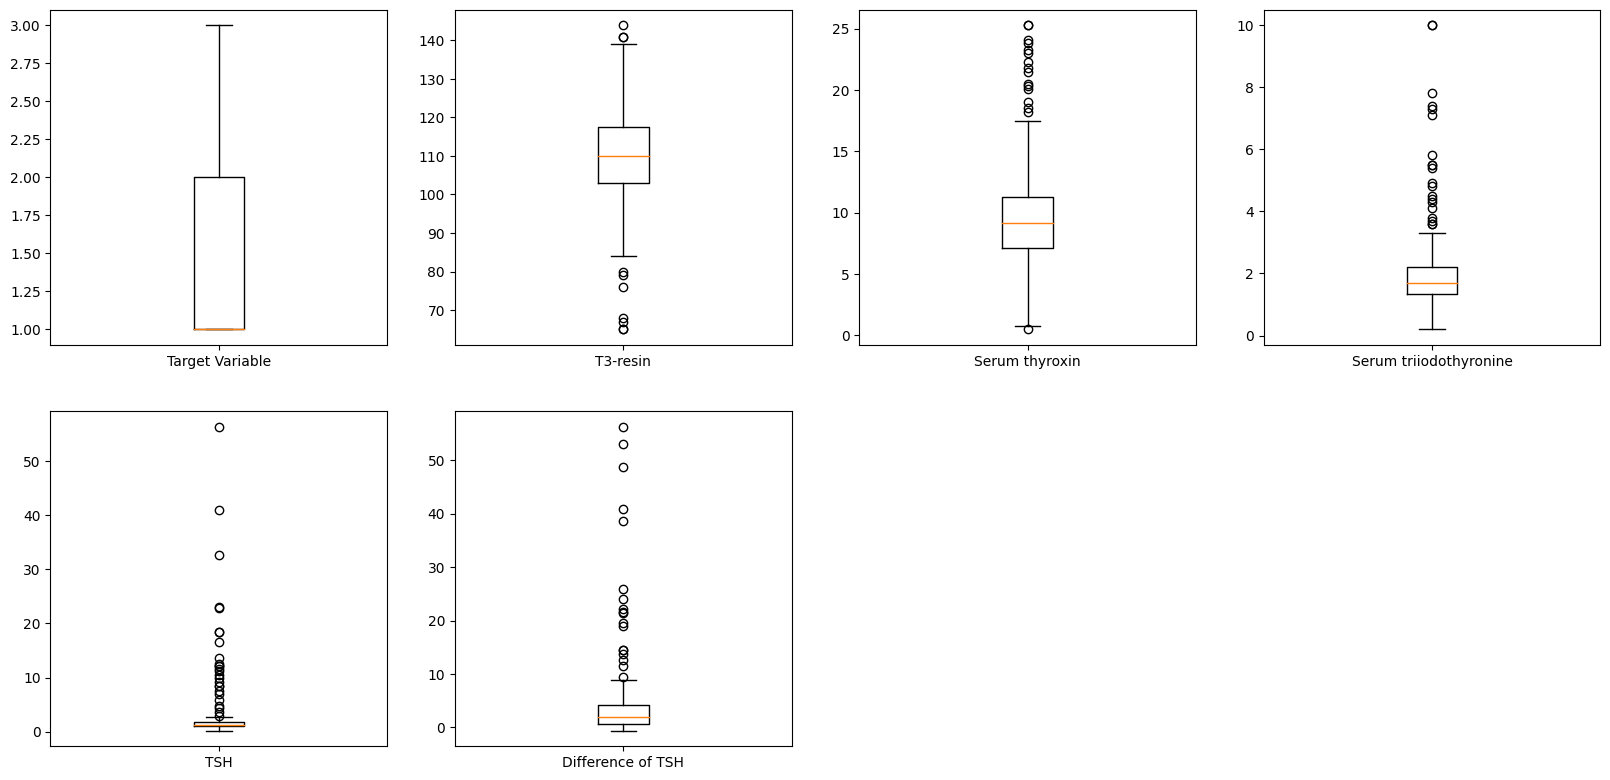

In [ ]:
Box_Plot_Outliers(df)

Distribution of each feature


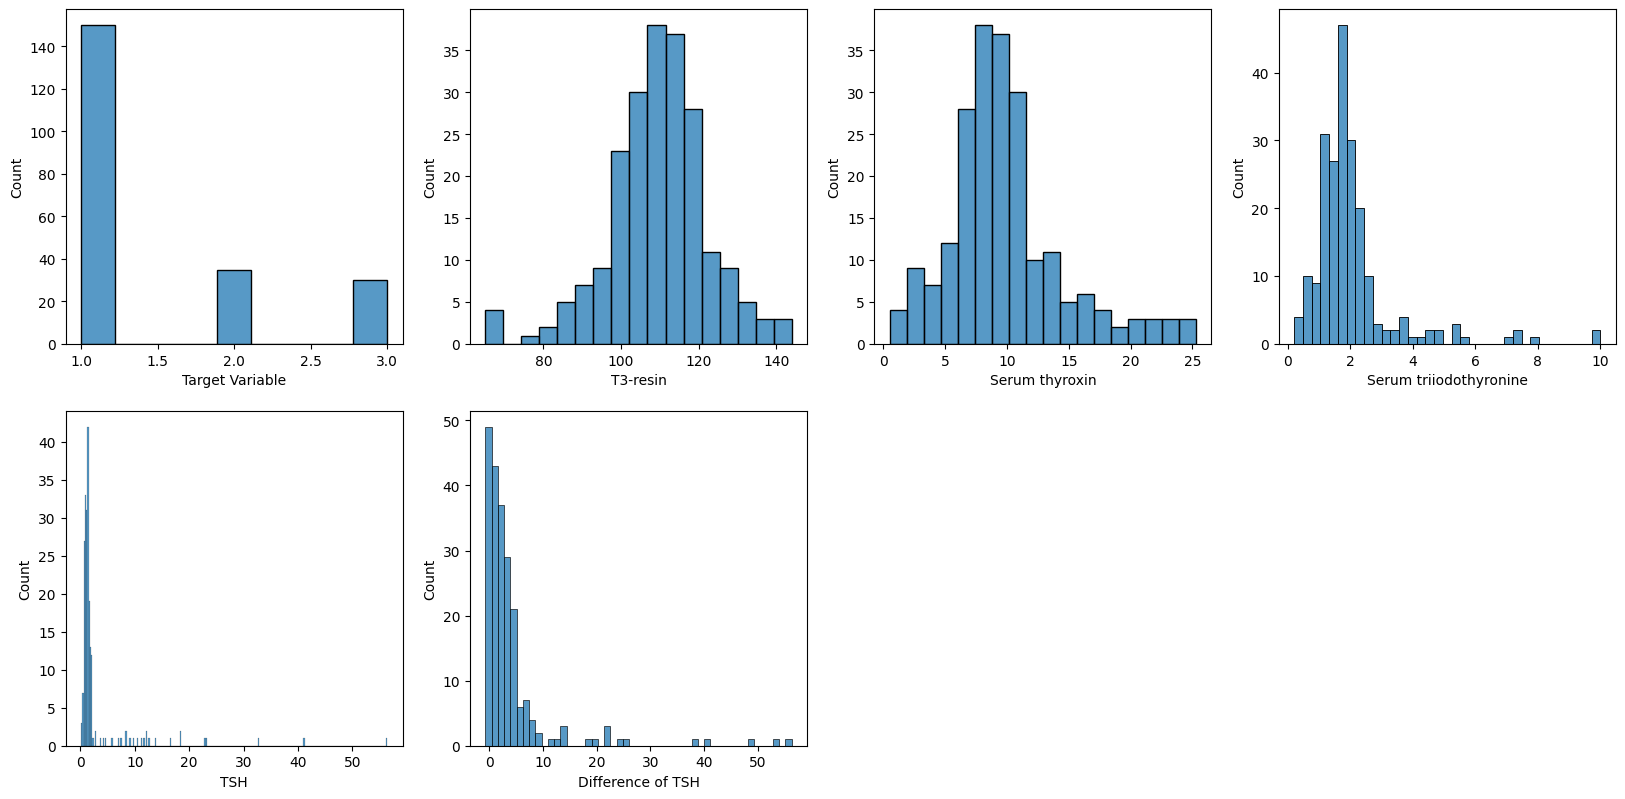

In [ ]:
Plot_Distribution(df)

Violin plot of each feature


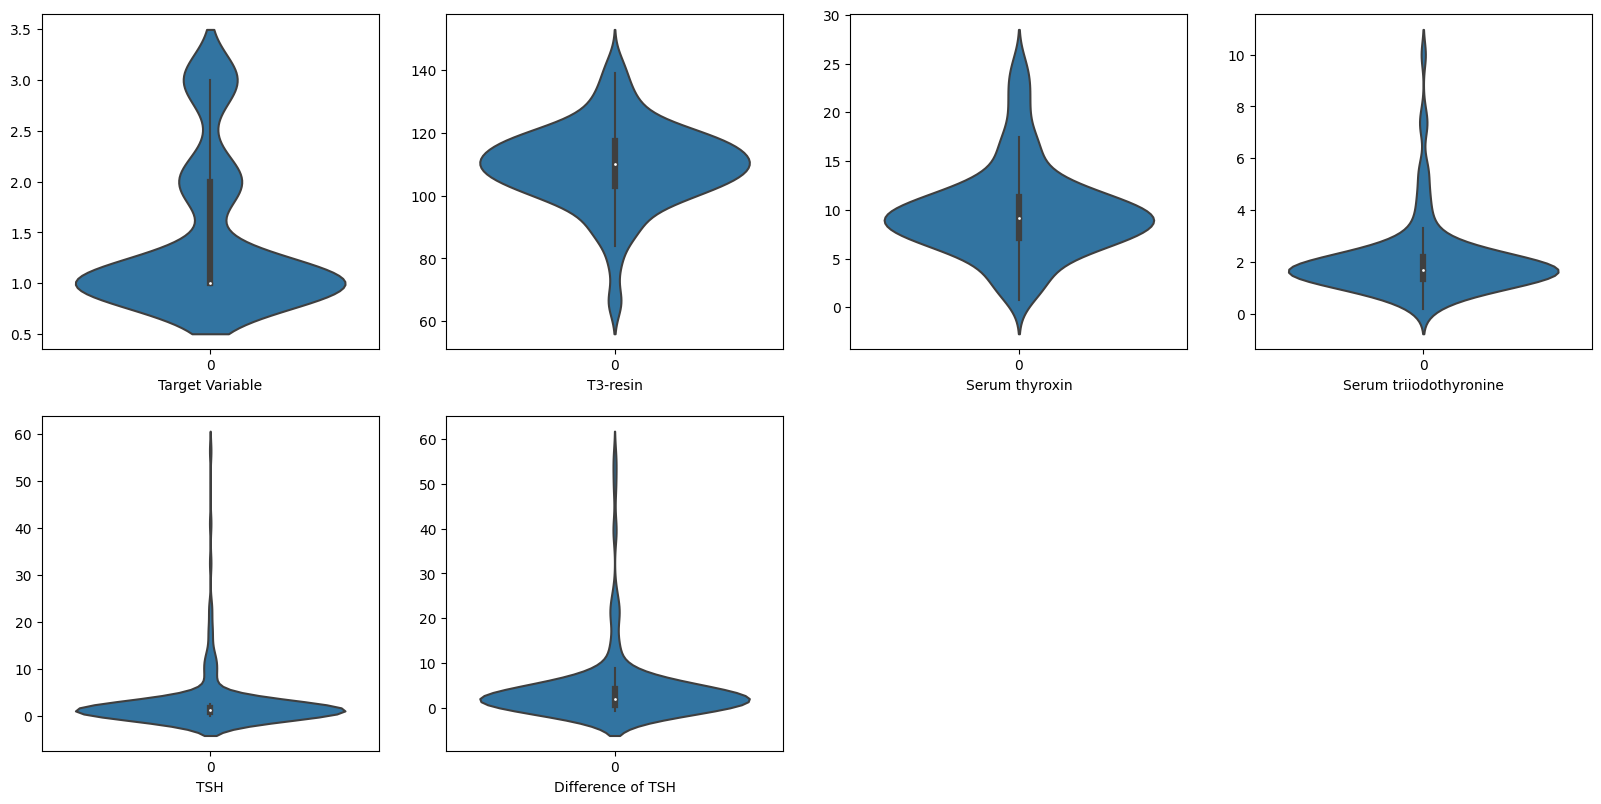

In [ ]:
Violin_plot(df)

KDE plot of each feature


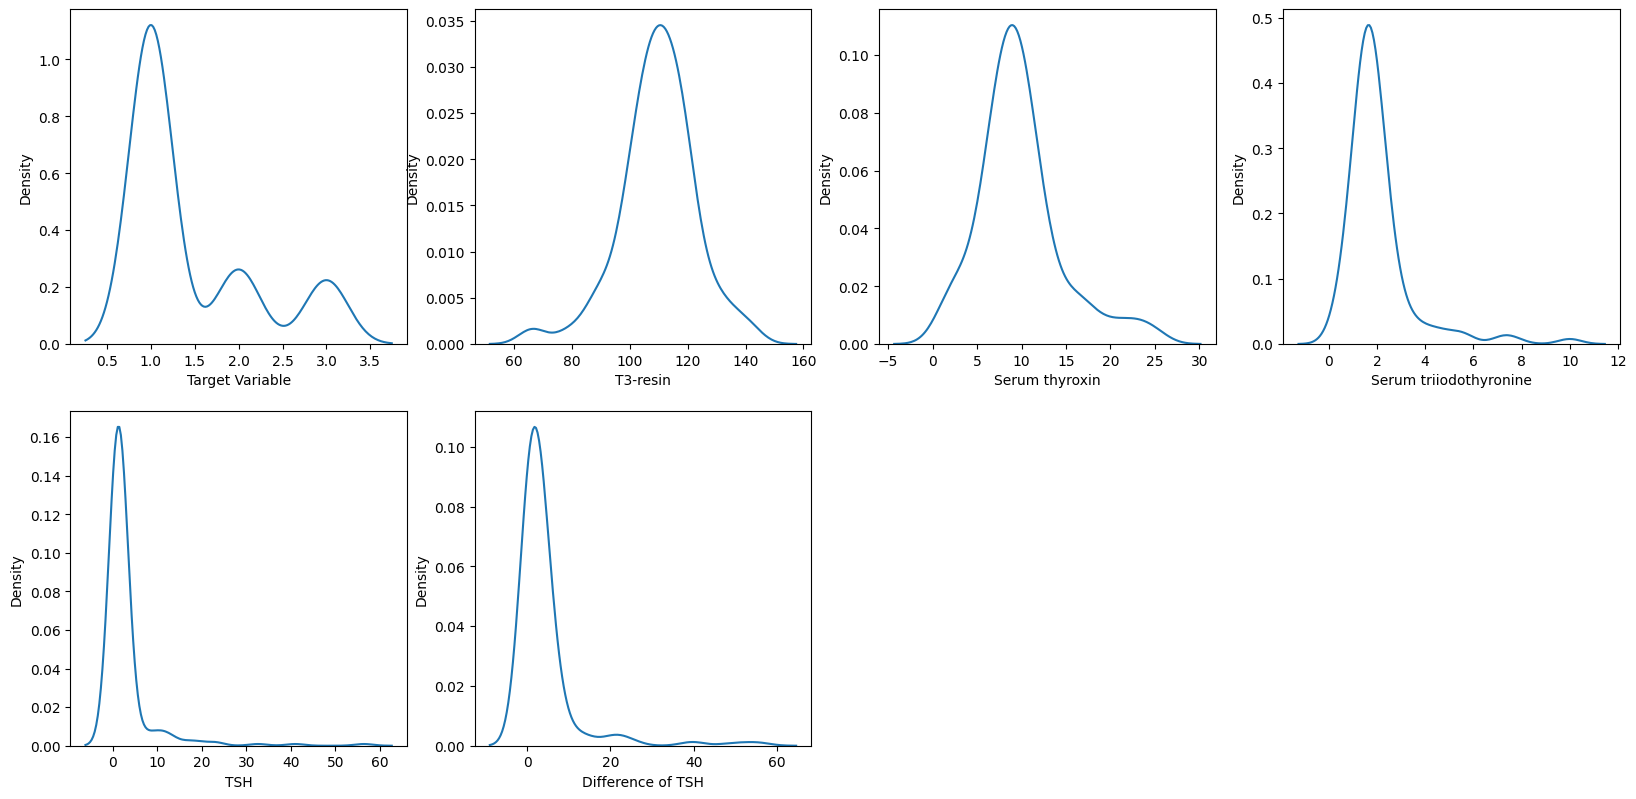

In [ ]:
KDE_Plot(df)

normal    150
hyper      35
hypo       30
Name: Target Variable, dtype: int64



<Axes: title={'center': 'Target Variable distribution'}>

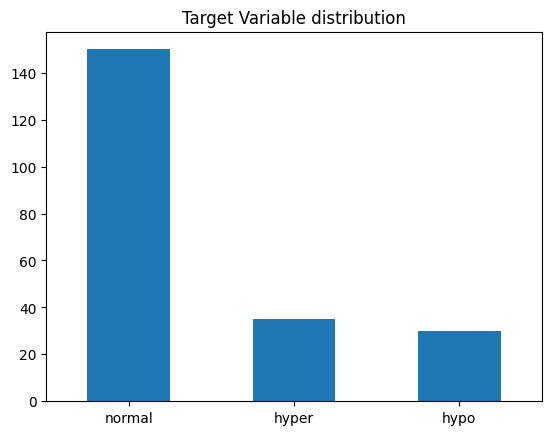

In [ ]:
Target_Column_Map = {
    1:'normal',
    2:'hyper',
    3:'hypo',
}

Target_Column = df['Target Variable'].map(Target_Column_Map)
print(Target_Column.value_counts())
print()
Target_Column.value_counts().plot(kind='bar', rot=0, title='Target Variable distribution')

KMEAN Clustering
Value counts of KMEAN Predicted and Actual respectively
hyper     153
normal     39
hypo       23
Name: KMEAN Predicted, dtype: int64

normal    150
hyper      35
hypo       30
Name: Actual, dtype: int64



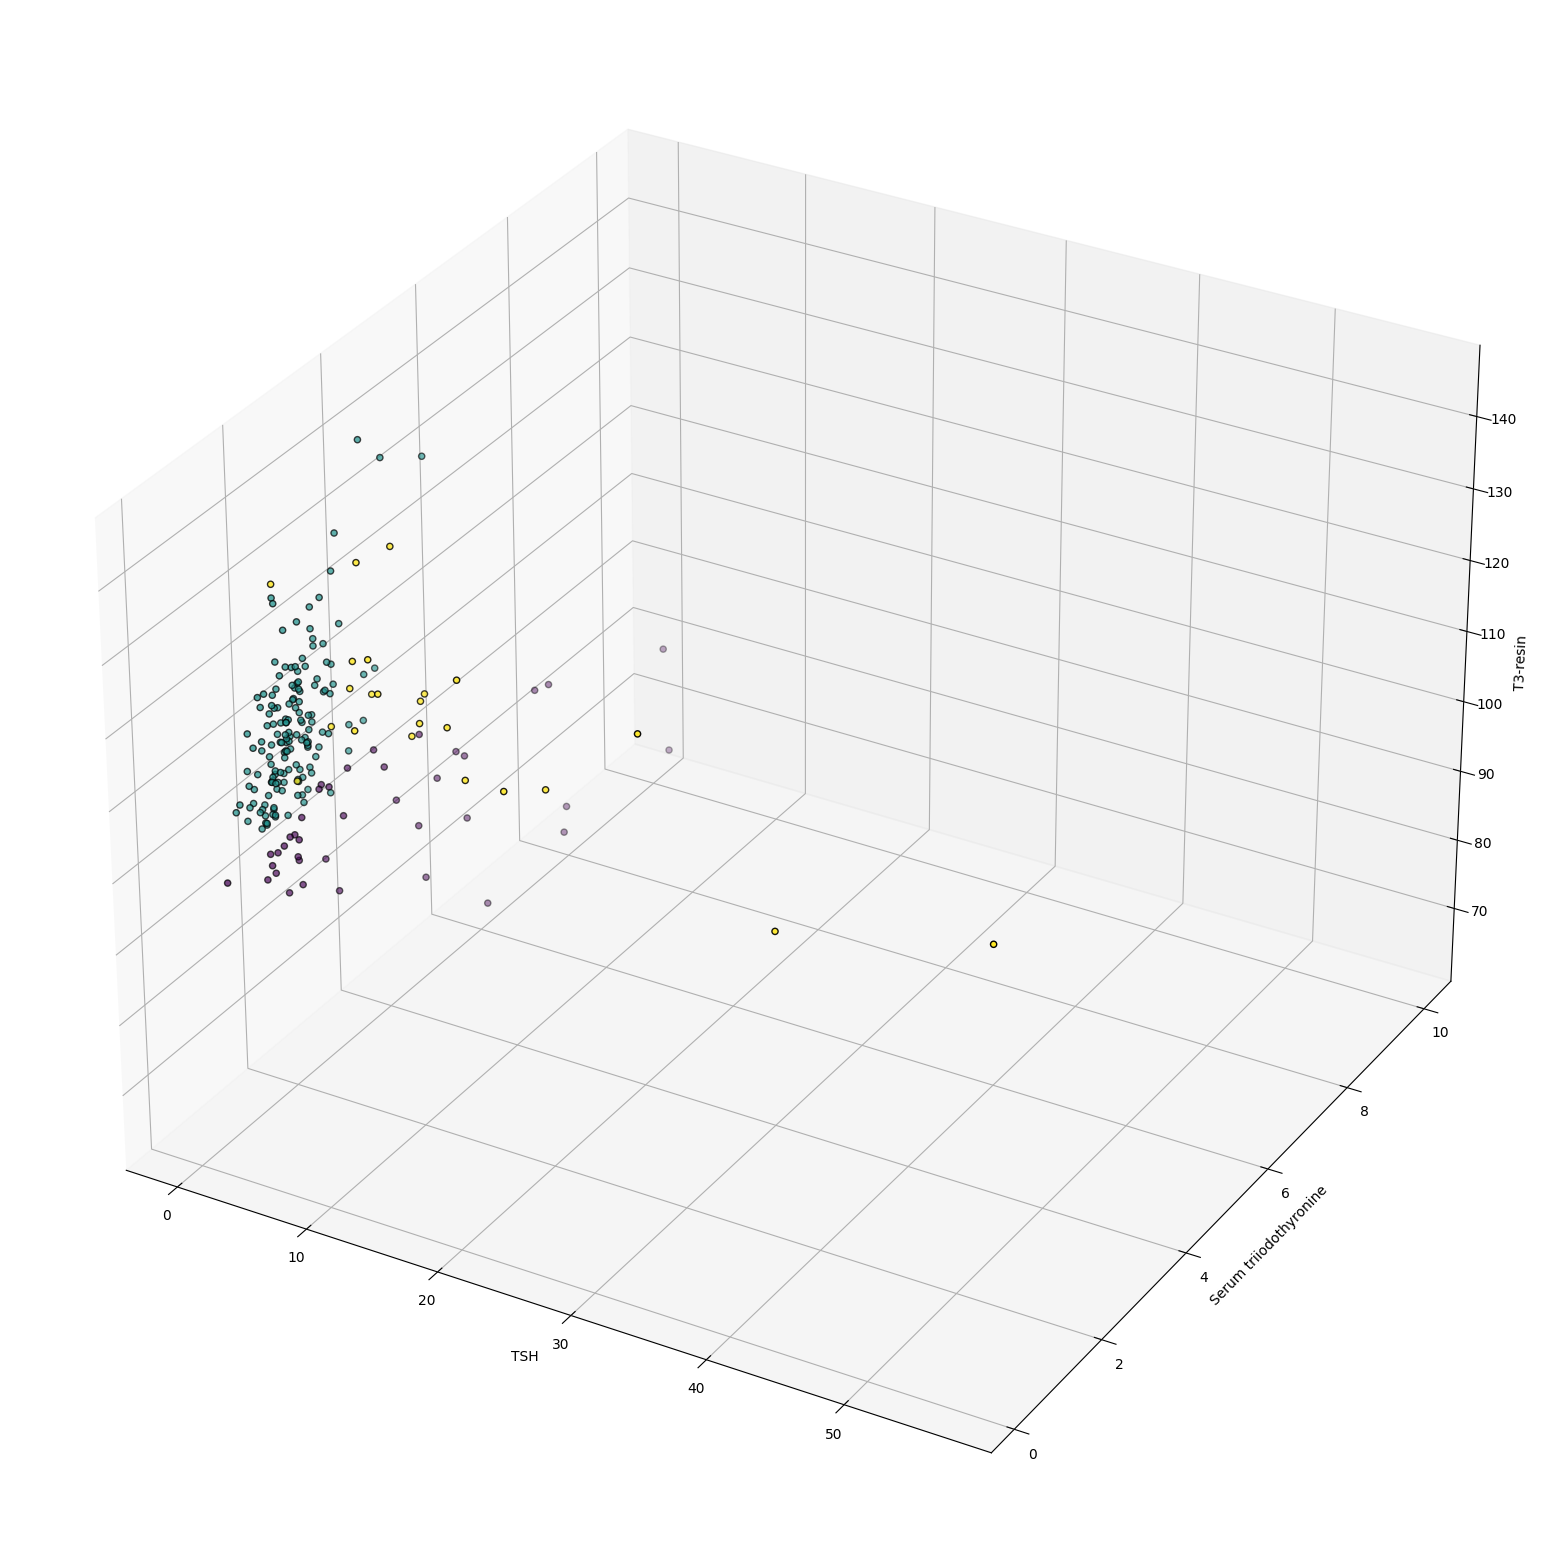

,Actual,KMEAN Predicted
0,normal,hyper
1,normal,hyper
2,normal,hyper
3,normal,hyper
4,normal,hyper
...,...,...
210,hypo,hyper
211,hypo,hypo
212,hypo,hyper
213,hypo,normal


In [ ]:
KMEAN_Clustering(df)

##OBSERVATIONS:

(i). Although we see that we have quite some outliers but we will not be proceeding to remove them because the models we will be testing with such as Random Forest, Decision Tree, etc. are extremely robust to outliers since they get averaged out by aggregations of trees.

(ii) T3-resin and Serum Thyroxin presents as following a normal Gaussian distribution from the KDE plot while the rest features were right skewed.

(iii) There's a high data imbalance in the Target variable class. Oversampling a relatively small dataset will lead to overfitting, so we leave the class imbalance.

(iv) Class imbalance exist in the target variable class, the dominate class is approximately 5times that of the 2 other classes. We won't be considering oversampling as its a relatively small dataset which can lead to overfitting.

(v). The initial classes was grouped 150,35 and 35. After Kmeans clustering it was 153, 39 and 23. Suggesting a there may exist a slight misclassification of some of the observation.

# STATISTICAL ANALYSIS

In [ ]:
def point_biserial_correlation(dataframe, label_name):
    '''Function to compute the point biserial correlation between a binary and a continuous variable'''
    print('Point biserial correlation with target label')
    BIserial_Correlation_Dataframe = pd.DataFrame(columns=['Feature','Point Biserial Correlation','P-Value'])
    for col in dataframe.columns:
        if col != label_name:
            point_biserial_corr, p_value = stats.pointbiserialr(dataframe[label_name], dataframe[col])
            BIserial_Correlation_Dataframe = BIserial_Correlation_Dataframe.append({'Feature':col,'Point Biserial Correlation':point_biserial_corr,'P-Value':p_value},ignore_index=True)
    return BIserial_Correlation_Dataframe


def kurtosis(dataframe):
    '''Function to compute the kurtosis of each feature'''
    print("Kurtosis of each feature")
    for col in dataframe.columns:
        print(f"Kurtosis of {col}:", dataframe[col].kurtosis())
    print()

def Plot_Skewness(dataframe):
    '''Function to plot the skewness of each feature'''
    print("Skewness of each feature")
    for col in dataframe.columns:
        print(f"Skewness of {col}:", dataframe[col].skew())
    print()

In [ ]:
point_biserial_correlation(df,'Target Variable')

Point biserial correlation with target label


,Feature,Point Biserial Correlation,P-Value
0,T3-resin,0.11,0.11
1,Serum thyroxin,-0.13,0.06
2,Serum triiodothyronine,0.08,0.23
3,TSH,0.56,0.00
4,Difference of TSH,0.52,0.00


Based on the Point Biserial Correlation scores presented, TSH and Difference of TSH stand out as the most important features for the target variable exhibiting notably high correlations (0.56 and 0.52, respectively), indicating a significant relationship with the target. In contrast, T3-resin and Serum triiodothyronine demonstrate relatively weaker correlations (0.11 and 0.08, respectively), while Serum thyroxine exhibits a negative correlation (-0.13) The significance of the features is further assessed by the corresponding P-Values. In our results, TSH and Difference of TSH possess the most substantial predictive power with extremely low P-Values (both at 0.00), confirming their importance in feature selection.





In [ ]:
kurtosis(df)

Kurtosis of each feature
Kurtosis of Target Variable: 0.16101328836439865
Kurtosis of T3-resin: 1.5930793919637245
Kurtosis of Serum thyroxin: 1.6343393595863458
Kurtosis of Serum triiodothyronine: 11.51866770841068
Kurtosis of TSH: 36.84960550410299
Kurtosis of Difference of TSH: 20.7693862464275



In [ ]:
Plot_Skewness(df)

Skewness of each feature
Skewness of Target Variable: 1.3103759719962915
Skewness of T3-resin: -0.5059345300231101
Skewness of Serum thyroxin: 1.032022165304225
Skewness of Serum triiodothyronine: 3.008418245262634
Skewness of TSH: 5.492282677586234
Skewness of Difference of TSH: 4.273522803665499



#FEATURE IMPORTANCE AND FEATURE SELECTION

In [ ]:
X = df.drop('Target Variable', axis=1)
y = df['Target Variable']

def Plot_Feature_Importance_to_Target_Label(dataframe,label_name):
    '''Function to plot the feature importance to the target label'''
    print("Feature importance to target label using three methods")

    #First Method Random Forest
    print("Random Forest")
    DF_Compare_Random_Forest = pd.DataFrame()
    X = dataframe.drop(label_name,axis=1)
    y = dataframe[label_name]
    model = RandomForestClassifier()
    model.fit(X,y)
    DF_Compare_Random_Forest['Random Forest Importance'] = model.feature_importances_
    DF_Compare_Random_Forest['Random Forest Importance %'] = DF_Compare_Random_Forest['Random Forest Importance']*100

    #Second Method Recursive Feature Elimination
    print("Recursive Feature Elimination")
    DF_Compare_RFE = pd.DataFrame()
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=1, step=1)
    fit = rfe.fit(X, y)
    DF_Compare_RFE['Recursive Feature Elimination Importance'] = fit.ranking_

    #Third Method lasso Regularization
    print("Lasso Regularization")
    DF_Compare_Lasso = pd.DataFrame()
    model = Lasso(alpha=0.1)
    model.fit(X,y)
    Coefficients = model.coef_
    DF_Compare_Lasso['Lasso Regularization Importance'] = Coefficients

    DF_Compare_RFE.index = X.columns
    DF_Compare_Random_Forest.index = X.columns
    DF_Compare_Lasso.index = X.columns

    DF_Compare_Random_Forest = DF_Compare_Random_Forest.sort_values(by='Random Forest Importance %',ascending=False)
    DF_Compare_RFE = DF_Compare_RFE.sort_values(by='Recursive Feature Elimination Importance',ascending=True)
    DF_Compare_Lasso = DF_Compare_Lasso.sort_values(by='Lasso Regularization Importance',ascending=True)

    return DF_Compare_Random_Forest,DF_Compare_RFE,DF_Compare_Lasso

In [ ]:
DF_Random_Forest,DF_RFE,DF_Lasso = Plot_Feature_Importance_to_Target_Label(df,'Target Variable')

Feature importance to target label using three methods
Random Forest
Recursive Feature Elimination
Lasso Regularization


In [ ]:
DF_Random_Forest

,Random Forest Importance,Random Forest Importance %
Serum thyroxin,0.41,40.88
Difference of TSH,0.20,20.09
TSH,0.18,18.42
Serum triiodothyronine,0.15,15.17
T3-resin,0.05,5.45


In [ ]:
DF_RFE

,Recursive Feature Elimination Importance
Serum thyroxin,1
Difference of TSH,2
TSH,3
Serum triiodothyronine,4
T3-resin,5


In [ ]:
DF_Lasso

,Lasso Regularization Importance
T3-resin,-0.00
Serum thyroxin,0.01
Difference of TSH,0.03
Serum triiodothyronine,0.05
TSH,0.05


The three techniques presented provide valuable insights into feature importance for thyroid disease prediction. Serum thyroxine consistently appears as an essential predictor in all three approaches. TSH and Serum triiodothyronine are also consistently ranked high in importance, reinforcing their role in accurate prediction. Despite minor differences in the rankings between the techniques, the consensus on the critical features (Serum thyroxine, TSH, and Serum triiodothyronine) enhances the credibility of these variables for feature selection in thyroid disease prediction models. Similarly,  Riajuliislam et al., 2021 performed RFE in several algorithms to see which features are most appropriate for a particular algorithm and found out three important features namely Serum thyroxine, TSH and Serum are consistently rated high in most of the algorithms used.

#DATA TRANSFORMATION

###SCALING OF THE FEATURES USING STANDARD SCALER

In [ ]:
# Creating a list of Numerical Columns
Numerical_Columns = set(df.columns) - set(['Target Variable'])

print('Total Columns:', len(Column_Names))
print('Numerical Columns:', len(Numerical_Columns))

Total Columns: 6
Numerical Columns: 5


## Creating Mapping of Label

In [ ]:
Class_Attributes_Map = {1:'normal',
                        2:'hyper',
                        3:'hypo'}

np.save(os.path.join('Label Mapping.npy'), Class_Attributes_Map)
Class_Attributes_Map

{1: 'normal', 2: 'hyper', 3: 'hypo'}

## Standardizing the numerical columns and saving the pickled version

In [ ]:
for col in Numerical_Columns:
    Scaler = StandardScaler()
    df[col] = Scaler.fit_transform(df[col].values.reshape(-1,1))
    pickle.dump(Scaler, open(os.path.join(str(col)+'.pkl'), 'wb'))
df

,Target Variable,T3-resin,Serum thyroxin,Serum triiodothyronine,TSH,Difference of TSH
0,1,-0.20,0.06,0.11,-0.32,-0.19
1,1,0.26,0.02,0.74,-0.14,0.21
2,1,1.33,0.66,0.25,-0.24,-0.45
3,1,-0.05,-0.96,-0.32,-0.24,-0.34
4,1,-0.35,-0.53,-0.39,-0.23,-0.53
...,...,...,...,...,...,...
210,3,0.64,-0.71,-0.53,-0.19,0.91
211,3,2.24,-1.20,-0.95,0.23,0.26
212,3,-0.50,-1.00,-0.46,-0.28,0.10
213,3,-0.96,-1.09,-0.67,-0.13,1.04


# MODELLING

## Splitting the dataset for training

In [ ]:
X = df.drop('Target Variable', axis=1)
y = df['Target Variable']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((172, 5), (172,), (43, 5), (43,))

## Some Functions

In [ ]:
def Metrics(actual,pred,prob):
    Accuracy = accuracy_score(actual,pred)*100
    Precision = precision_score(actual,pred,average='macro')*100
    Recall = recall_score(actual,pred,average='macro')*100
    F1 = f1_score(actual,pred,average='macro')*100
    ROC_AUC = roc_auc_score(actual,prob,average='macro',multi_class='ovr')*100
    ClassificationReport = classification_report(actual,pred)
    ConfusionMatrix = confusion_matrix(actual,pred)
    return (Accuracy,Precision,Recall,F1,ROC_AUC,ClassificationReport,ConfusionMatrix)

def Display_Metrics(metrics_tuple):
    # print("Accuracy: ",metrics_tuple[0])
    # print("Precision: ",metrics_tuple[1])
    # print("Recall: ",metrics_tuple[2])
    # print("F1: ",metrics_tuple[3])
    # print("ROC_AUC: ",metrics_tuple[4])
    print("Classification Report: \n",metrics_tuple[5])
    print("Confusion Matrix: \n")
    sns.heatmap(metrics_tuple[6],annot=True,fmt='d',cmap='Blues')
    plt.show()

def Save_Model(Path):
    pickle.dump(open(Path,'wb'))

###Using Lazy Predict library to get a quick idea of what models to use

In [ ]:
model = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = model.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 23.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
GaussianNB,1.00,1.00,None,1.00,0.02
LogisticRegression,1.00,1.00,None,1.00,0.04
BaggingClassifier,1.00,1.00,None,1.00,0.05
RandomForestClassifier,1.00,1.00,None,1.00,0.18
ExtraTreesClassifier,1.00,1.00,None,1.00,0.13
LabelSpreading,0.98,0.99,None,0.98,0.02
LabelPropagation,0.98,0.99,None,0.98,0.02
LGBMClassifier,0.98,0.95,None,0.98,0.10


### Selecting the top three models for further experimentations

In [ ]:
def Train_Evaluate_Models(Models_Dict,X_train,y_train,X_test,y_test):
    Models_DF = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC'])
    for ModelName,Model in Models_Dict.items():
        print(f'Training model {ModelName}')
        Model.fit(X_train,y_train)
        y_pred = Model.predict(X_test)
        y_pred_prob = Model.predict_proba(X_test)
        Metrics_Tuple = Metrics(y_test, y_pred,y_pred_prob)
        Display_Metrics(Metrics_Tuple)
        Models_DF = Models_DF.append({'Model':ModelName,'Accuracy':Metrics_Tuple[0],'Precision':Metrics_Tuple[1],'Recall':Metrics_Tuple[2],'F1':Metrics_Tuple[3],'ROC AUC':Metrics_Tuple[4]},ignore_index=True)
        Models_Dict[ModelName] = Model
    return Models_DF,Models_Dict

Training and Evaluating Models without hyperparameter tuning
Training model Quadratic Discriminant Analysis
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix: 



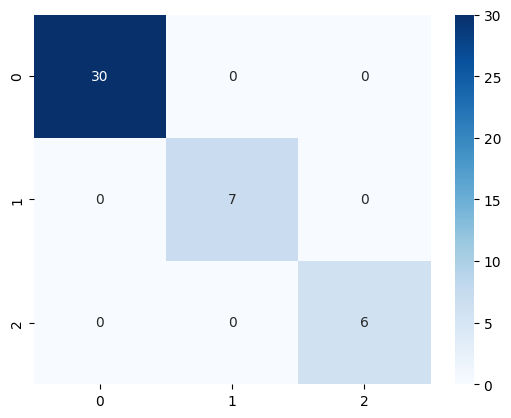

Training model Logistic Regression
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix: 



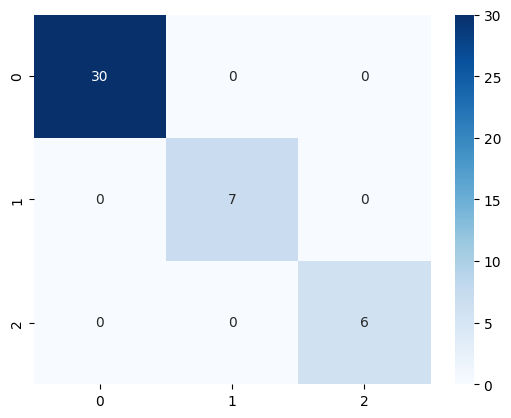

Training model Gaussian Naive Bayes
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix: 



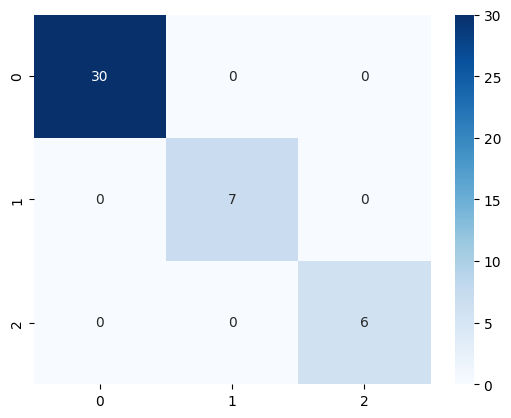

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Quadratic Discriminant Analysis,100.00,100.00,100.00,100.00,100.00
1,Logistic Regression,100.00,100.00,100.00,100.00,100.00
2,Gaussian Naive Bayes,100.00,100.00,100.00,100.00,100.00


In [ ]:
Models_Dict = {
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
}

print('Training and Evaluating Models without hyperparameter tuning')
DF,UnoptimizedModels = Train_Evaluate_Models(Models_Dict, x_train, y_train, x_test, y_test)
DF


##Cross Validation with five folds

In [ ]:
def Cross_Validate(Model_dict,X,Y):
    #Display CV train and test scores for 5 folds for all models in a dataframe
    DF_Results = pd.DataFrame(columns=['Train Mean','Test Mean'])
    for modelName,Model in Model_dict.items():
        cv = cross_validate(Model, X, Y, scoring="accuracy", cv=5,return_train_score=True)
        DF_Results = DF_Results.append({'Train Mean':cv['train_score'].mean(),'Test Mean':cv['test_score'].mean()},ignore_index=True)
    DF_Results.index = Model_dict.keys()
    return DF_Results

In [ ]:
def Cross_Validate_New(Model_dict,X,Y):
    df = pd.DataFrame(columns=['Model','Mode','Cross Validation Folds 1','Cross Validation Folds 2','Cross Validation Folds 3','Cross Validation Folds 4','Cross Validation Folds 5','Mean Value'])
    for modelName,Model in Model_dict.items():
          cv = cross_validate(Model, X, Y, scoring="accuracy", cv=5,return_train_score=True)
          df = df.append({'Model':modelName,'Mode':'Train','Cross Validation Folds 1':cv['train_score'][0],'Cross Validation Folds 2':cv['train_score'][1],'Cross Validation Folds 3':cv['train_score'][2],'Cross Validation Folds 4':cv['train_score'][3],'Cross Validation Folds 5':cv['train_score'][4],'Mean Value':cv['train_score'].mean()},ignore_index=True)
          df = df.append({'Model':modelName,'Mode':'Test','Cross Validation Folds 1':cv['test_score'][0],'Cross Validation Folds 2':cv['test_score'][1],'Cross Validation Folds 3':cv['test_score'][2],'Cross Validation Folds 4':cv['test_score'][3],'Cross Validation Folds 5':cv['test_score'][4],'Mean Value':cv['test_score'].mean()},ignore_index=True)

    df = df.groupby(['Model','Mode']).agg({'Cross Validation Folds 1':'mean','Cross Validation Folds 2':'mean','Cross Validation Folds 3':'mean','Cross Validation Folds 4':'mean','Cross Validation Folds 5':'mean','Mean Value':'mean'})
    return df

DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results


Cross Validation Folds 1  \
Model                           Mode                              
Gaussian Naive Bayes            Test                       0.95   
                                Train                      0.98   
Logistic Regression             Test                       0.93   
                                Train                      0.97   
Quadratic Discriminant Analysis Test                       0.95   
                                Train                      0.97   

                                       Cross Validation Folds 2  \
Model                           Mode                              
Gaussian Naive Bayes            Test                       0.95   
                                Train                      0.98   
Logistic Regression             Test                       0.98   
                                Train                      0.96   
Quadratic Discriminant Analysis Test                       0.93   
                                Train                      0.98   

                                       Cross Validation Folds 3  \
Model                           Mode                              
Gaussian Naive Bayes            Test                       1.00   
                                Train                      0.97   
Logistic Regression             Test                       0.98   
                                Train                      0.95   
Quadratic Discriminant Analysis Test                       1.00   
                                Train                      0.96   

                                       Cross Validation Folds 4  \
Model                           Mode                              
Gaussian Naive Bayes            Test                       1.00   
                                Train                      0.97   
Logistic Regression             Test                       0.98   
                                Train                      0.97   
Quadratic Discriminant Analysis Test                       1.00   
                                Train                      0.96   

                                       Cross Validation Folds 5  Mean Value  
Model                           Mode                                         
Gaussian Naive Bayes            Test                       0.93        0.97  
                                Train                      0.98        0.97  
Logistic Regression             Test                       0.88        0.95  
                                Train                      0.98        0.97  
Quadratic Discriminant Analysis Test                       0.93        0.96  
                                Train                      0.98        0.97

###OBSERVATION: the models appears to be overfitting as the cross validation simulates an outcome close to reality based on the presented results. Hence getting room for hyperparameter tuning.

#OPTIMIZATION - HYPERPARAMETER TUNING

In [ ]:
def Train_Evaluate_Optimize_Models(Model_Param_Dict,X_train,y_train,X_test,y_test):
    Models_DF = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC'])
    for ModelName,ModelDetails in Model_Param_Dict.items():
        print(f'Training model {ModelName}')
        Model = ModelDetails['Model']
        ModelParams = ModelDetails['Params']

        GridSearchModel = GridSearchCV(Model,ModelParams,cv=5)
        Best_Params = GridSearchModel.fit(X_train,y_train).best_params_
        print(f"Best params for {ModelName} are {Best_Params}")

        OptimizedModel = Model.set_params(**Best_Params)
        OptimizedModel.fit(X_train,y_train)
        y_pred = OptimizedModel.predict(X_test)
        y_pred_prob = OptimizedModel.predict_proba(X_test)
        Metrics_Tuple = Metrics(y_test, y_pred,y_pred_prob)
        Display_Metrics(Metrics_Tuple)
        Models_DF = Models_DF.append({'Model':ModelName,'Accuracy':Metrics_Tuple[0],'Precision':Metrics_Tuple[1],'Recall':Metrics_Tuple[2],'F1':Metrics_Tuple[3],'ROC AUC':Metrics_Tuple[4]},ignore_index=True)
        Model_Param_Dict[ModelName]['Model'] = OptimizedModel
    return Models_DF,Model_Param_Dict

Training and Evaluating Models with hyperparameter tuning
Training model Quadratic Discriminant Analysis
Best params for Quadratic Discriminant Analysis are {'reg_param': 0.1, 'tol': 0.0001}
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00         7
           3       1.00      0.83      0.91         6

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43

Confusion Matrix: 



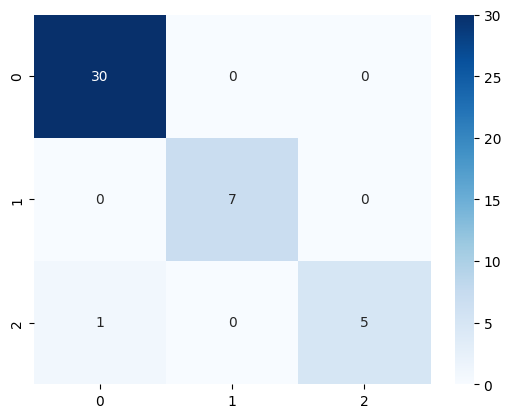

Training model Logistic Regression
Best params for Logistic Regression are {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00         7
           3       1.00      0.83      0.91         6

    accuracy                           0.98        43
   macro avg       0.99      0.94      0.96        43
weighted avg       0.98      0.98      0.98        43

Confusion Matrix: 



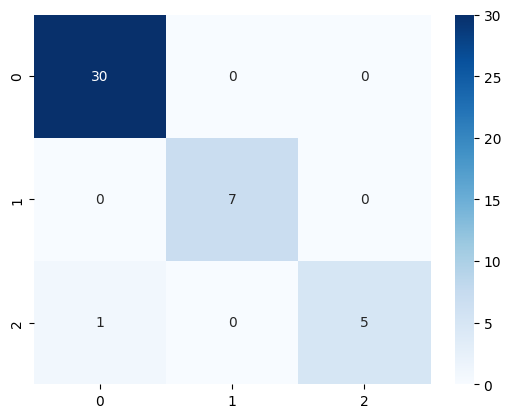

Training model Gaussian Naive Bayes
Best params for Gaussian Naive Bayes are {'var_smoothing': 0.0}
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Confusion Matrix: 



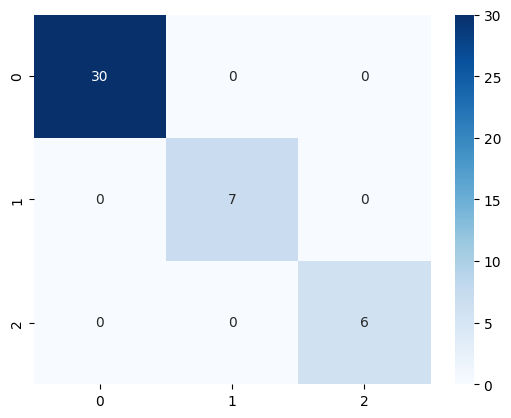

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Quadratic Discriminant Analysis,97.67,98.92,94.44,96.42,100.00
1,Logistic Regression,97.67,98.92,94.44,96.42,100.00
2,Gaussian Naive Bayes,100.00,100.00,100.00,100.00,100.00


In [ ]:
QuadraticDiscriminantAnalysis_Params = {
    'reg_param':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'tol':[0.0001, 0.001, 0.01, 0.1],
}
GaussianNaiveBayes_Params = {
    'var_smoothing':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
LogisticRegression_Params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag', 'newton-cholesky']
}
Model_Param_Dict = {
        'Quadratic Discriminant Analysis':{'Model': QuadraticDiscriminantAnalysis(),'Params': QuadraticDiscriminantAnalysis_Params},
        'Logistic Regression':{'Model': LogisticRegression(),'Params': LogisticRegression_Params},
        'Gaussian Naive Bayes':{'Model': GaussianNB(),'Params': GaussianNaiveBayes_Params},
}

print('Training and Evaluating Models with hyperparameter tuning')
DF_optimized,OptimizedModels = Train_Evaluate_Optimize_Models(Model_Param_Dict, x_train, y_train, x_test, y_test)
DF_optimized

The top three models were selected based on their accuracy, recall and F1 score as presented. Quadratic Discriminant Analysis, Logistic Regression, and Gaussian Naive Bayes were all identified with accuracy of 100% and F1 score of 100%. Cross-validation with five folds was performed to assess the models' generalization abilities as shown in Table 3.4 which revealed potential signs of overfitting. The Gaussian Naive Bayes model emerged as the best-performing model, with equal mean train accuracy and mean test accuracy of 97% on cross-validation. The hyperparameter of the top three models as shown above significantly improved the cross validated Gaussian Naive Bayes and gave a slight model improvement on the quadratic discriminant analysis and Logistic regression. In a previous work of Salman et al., 2021, Logistic regression and Gaussian Naive Bayes gave an accuracy of  91.73% and 90.67% respectively. The results show substantial performance in classifications of thyroid disease.